<a href="https://colab.research.google.com/github/abinayaa123/ME592/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys
from google.colab import drive
# This mouunts your google drive to the current runtime
drive.mount('/content/mnt')
# We define a notebook path
nb_path = '/content/notebooks'
# We create a symbolic link from our drive's default "Colab Notebooks" folder to nb_path
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
# Insert nb path
sys.path.insert(0, nb_path)

Mounted at /content/mnt


FileExistsError: ignored

In [2]:
!ls /content/mnt/MyDrive/ME592/Assignment\ 1 #data folder

airfoil_self_noise.dat	energydata_complete.csv  HW1.pdf  sudoku-original.png


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Section 2.1 Images

(423, 419, 3)


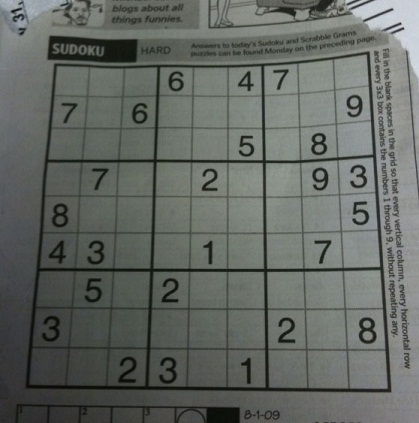

In [4]:
import cv2
from google.colab.patches import cv2_imshow
sudoku_image = cv2.imread('/content/mnt/MyDrive/ME592/Assignment 1/sudoku-original.png')
print(sudoku_image.shape)
cv2_imshow(sudoku_image)

 1. Read Image in grayscale

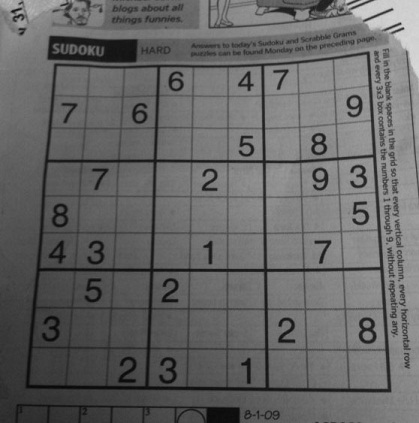

In [5]:
#image in grayscale
gray = cv2.cvtColor(sudoku_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


2. Histogram of Intensities

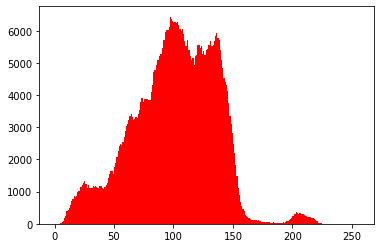

In [6]:
#histogram of intensities
_ = plt.hist(sudoku_image.flatten(),256,[0,256], color = 'r')

3. Perspective Transformation

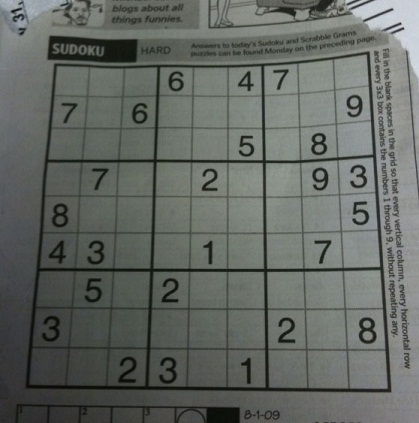

Transformed Image


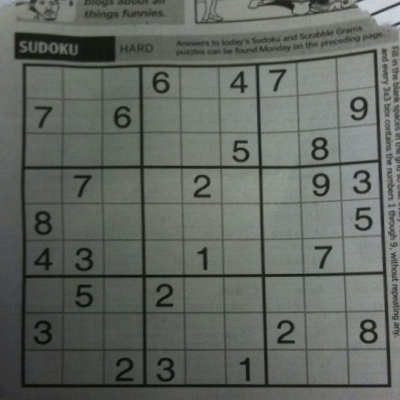

In [23]:
pt_1 = np.float32([[56,65], [368, 53],[389, 392], [28, 387]]) #identified the xy points using imtool in matlab as the code in colab was running into a server error and crashing.
pt_2 = np.float32([[25, 65], [375, 51],[389, 387], [24, 386]]) #start decreasing the x coordinate of the first point to expand the image, trial and error to achieve the best transformation 

matrix = cv2.getPerspectiveTransform(pt_1, pt_2)
result = cv2.warpPerspective(sudoku_image, matrix, (400, 400))

cv2_imshow(sudoku_image) 
print("Transformed Image")
cv2_imshow(result)


# Section 2.2 Time Series

In [24]:
energy_data = pd.read_csv('/content/mnt/MyDrive/ME592/Assignment 1/energydata_complete.csv')

In [39]:
energy_data['ind'] = range(0,len(energy_data))
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption,ind
0,1/11/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,0
1,1/11/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,1
2,1/11/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,2
3,1/11/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,3
4,1/11/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,4


1. Energy Consumption for whole period and One Week

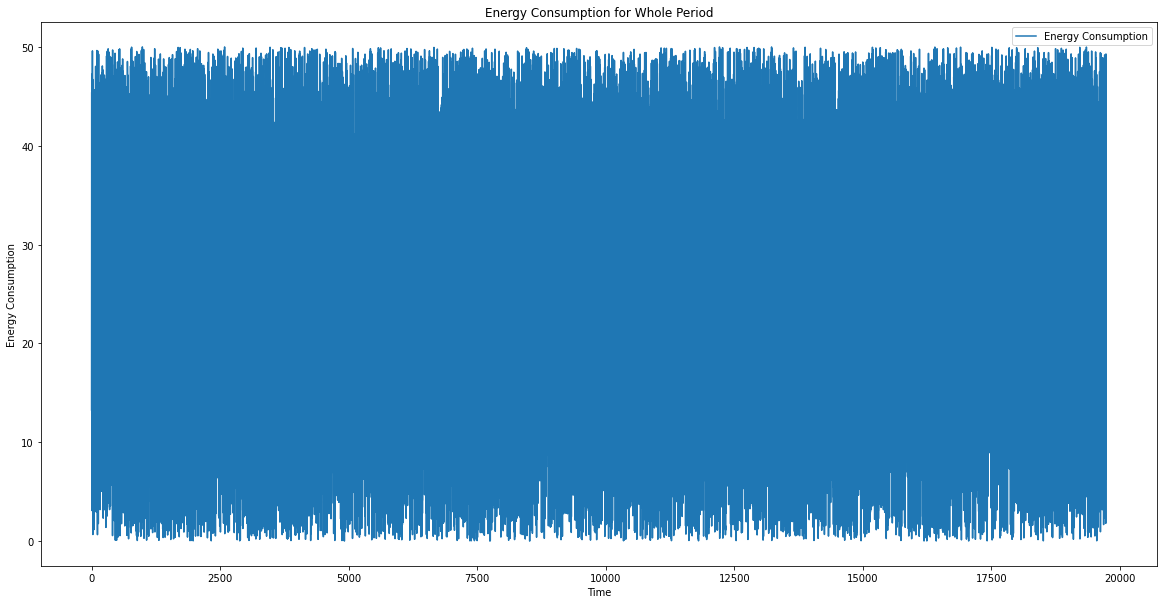

In [41]:
plt.figure(figsize=(20,10))
plt.plot(energy_data['ind'],energy_data['Energy Consumption'], label='Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption for Whole Period')
plt.legend()
plt.show()

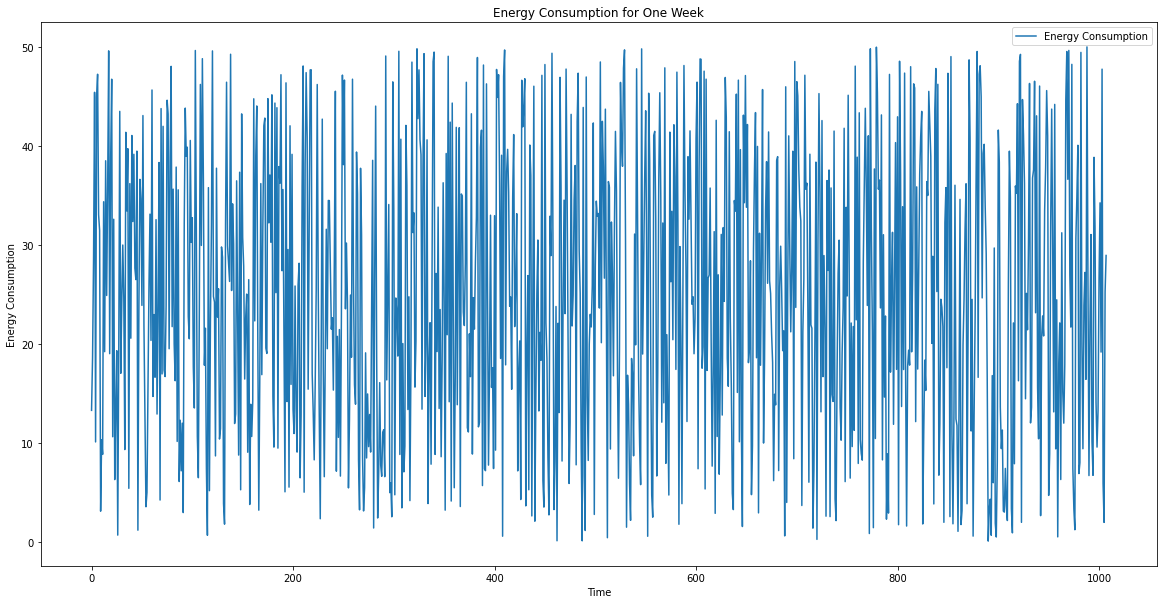

In [44]:
num_data_week = int((7*24*60)/10) #( 7 days a week * 24 hrs a day * 60 minutes / 10 minute data point)
plt.figure(figsize=(20,10))
plt.plot(energy_data['ind'][0:num_data_week],energy_data['Energy Consumption'][0:num_data_week], label='Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption for One Week')
plt.legend()
plt.show()

2. Heat map of hourly consumption for a week

In [60]:
d = np.zeros((24,7))
week_data = pd.DataFrame(d,columns=['Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7'])

for i in range(1,8):
  col = 'Day_' + str(i)
  for j in range(0,24):
    s = j*6 + (24*(i-1)*6)
    #print(s)
    week_data[col][j] = np.sum(energy_data['Energy Consumption'][s:s+6])

In [61]:
week_data

,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7
0,160.938267,153.661904,100.995431,130.757648,197.654167,166.710715,119.086975
1,133.945235,131.751030,119.307363,142.440353,114.933467,133.711597,146.691439
2,202.409591,113.762319,154.451690,109.508642,194.874457,146.400408,186.091706
3,154.077851,145.962971,89.656825,132.968080,164.202729,95.048114,230.983445
4,112.957645,188.993045,138.023879,143.575650,229.539075,134.610938,53.906196
5,162.862245,208.485939,198.639894,126.082711,154.154809,135.652955,62.854299
6,175.258768,147.051593,221.657381,184.608736,134.269213,150.246127,117.370878
7,157.780308,203.731116,146.612412,142.361979,121.214506,135.412251,81.781133
8,172.338439,142.642426,165.881296,190.132971,163.032425,194.740494,104.895388
9,103.694322,118.635797,125.647159,108.259205,156.942059,152.659262,195.465785


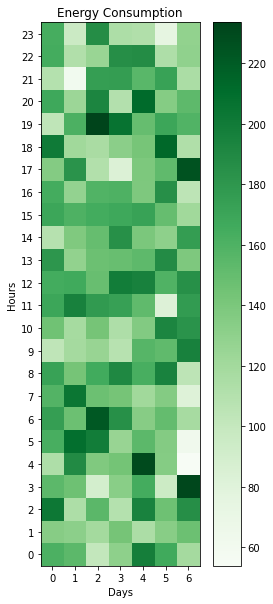

In [130]:
plt.figure(figsize=(5,10))
plt.imshow(week_data,cmap = 'Greens')

plt.ylim([-0.5,23.5])
plt.xticks(np.arange(0, 7, 1.0))
plt.yticks(np.arange(0, 24, 1.0))
plt.colorbar()
plt.ylabel('Hours')
plt.xlabel('Days')
plt.title('Energy Consumption')
plt.show()

3. Histogram of Energy Consumption

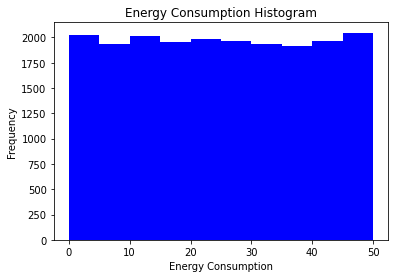

In [71]:
plt.hist(energy_data['Energy Consumption'],color='blue')
plt.ylabel('Frequency')
plt.xlabel('Energy Consumption')
plt.title('Energy Consumption Histogram')
plt.show()

4. Energy Consumption by No. of seconds from midnight

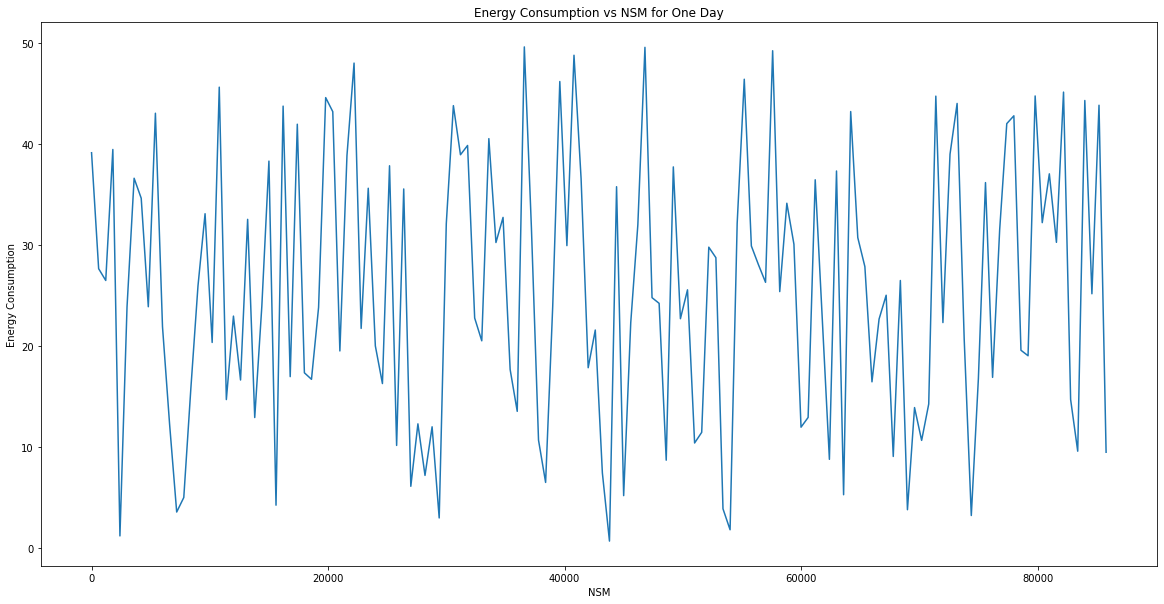

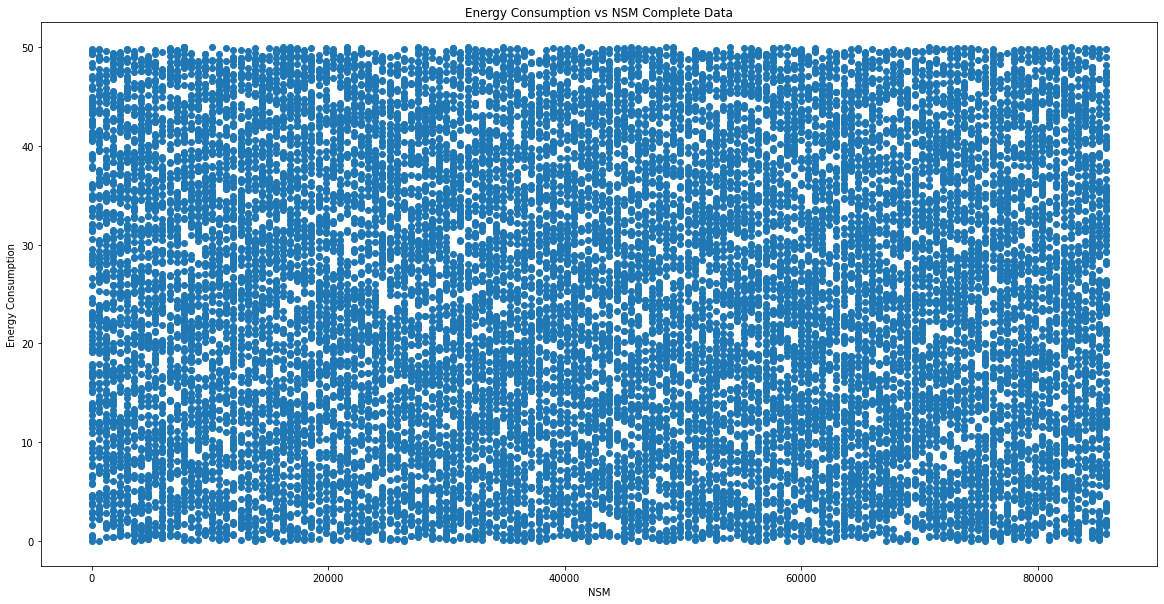

In [106]:
energy_data['NSM']=0
t = energy_data['date'][0]
energy_data['timestamp'] = pd.to_datetime(energy_data['date'])
#energy_data['time'] = energy_data['timestamp'].dt.time
energy_data['NSM'] = energy_data['timestamp'].dt.hour * 60 * 60 + energy_data['timestamp'].dt.minute * 60

plt.figure(figsize=(20,10))
plt.plot(energy_data['NSM'][42:186],energy_data['Energy Consumption'][42:186])
plt.xlabel('NSM')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs NSM for One Day')
plt.show()

plt.figure(figsize=(20,10))
plt.scatter(energy_data['NSM'],energy_data['Energy Consumption'])
plt.xlabel('NSM')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs NSM Complete Data')
plt.show()

5. Energy Consumption vs Pressure

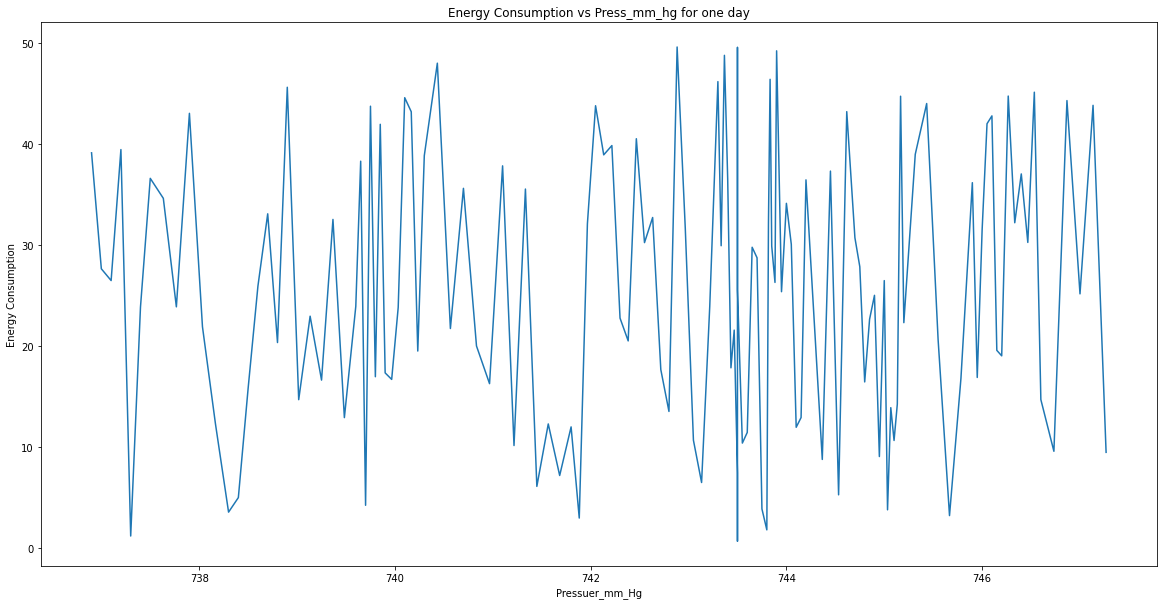

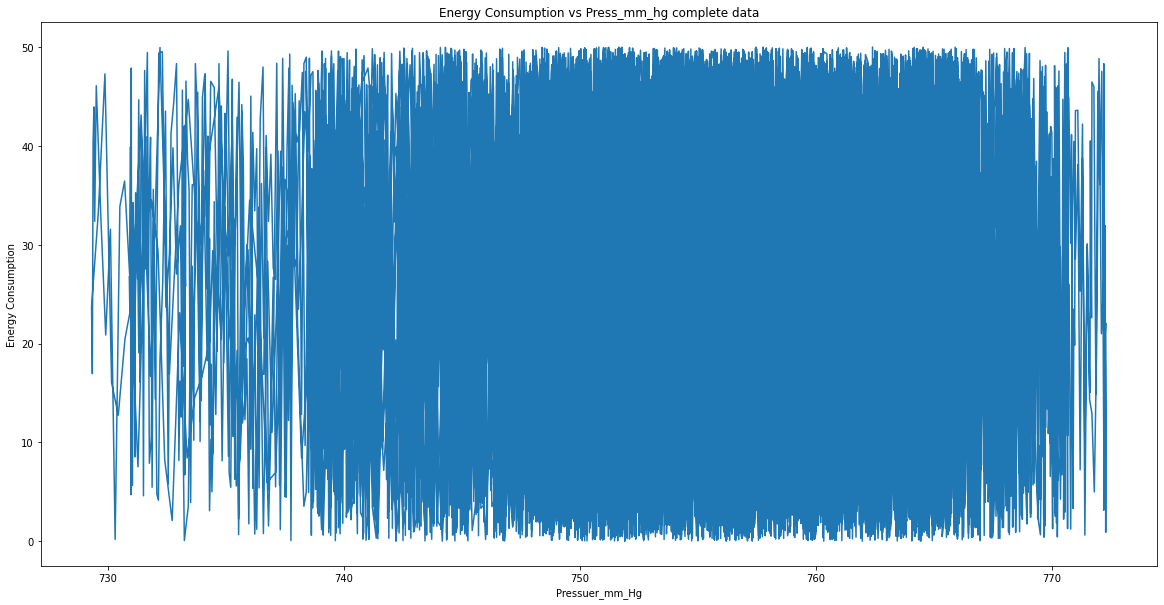

In [112]:
plt.figure(figsize=(20,10))
plt.plot(energy_data['Press_mm_hg'][42:186],energy_data['Energy Consumption'][42:186])
plt.ylabel('Energy Consumption')
plt.xlabel('Pressuer_mm_Hg')
plt.title('Energy Consumption vs Press_mm_hg for one day')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(energy_data['Press_mm_hg'],energy_data['Energy Consumption'])
plt.ylabel('Energy Consumption')
plt.xlabel('Pressuer_mm_Hg')
plt.title('Energy Consumption vs Press_mm_hg complete data')
plt.show()

6. NSM is a better contributing factor, as we can identify the peak hours of consumption clearly. On other hand, the range of pressure value is small and for the same pressure values we can see large fluctuations from small to large energy consumptions.

# Section 2.3 Multi-variate

In [127]:
import scipy.stats as sp

df = pd.read_table('/content/mnt/MyDrive/ME592/Assignment 1/airfoil_self_noise.dat',
                   header=None, names=['Freq','Angle of Attack','Chord Length','Free Stream Velocity','Suction side displacement','Sound Pressure']) #import data
df

,Freq,Angle of Attack,Chord Length,Free Stream Velocity,Suction side displacement,Sound Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [128]:
def descrp_stat(value): #function to calculate decriptive statistics
    
    mean = np.mean(value)
    print('Mean:', mean)
    
    variance = np.var(value)
    print('Variance:', variance)
    
    median = np.median(value)
    print('Median:', median)
    
    kurt = sp.kurtosis(value)
    print('Kurtosis:', kurt)
    
    skew = sp.skew(value)
    print('Skewness:', skew)
    
    rang = np.ptp(value)
    print('Range:', rang)

In [129]:
print('Descriptive Statistics of Frequency, in Hz')
descrp_stat(df['Freq'])
print()
print('Descriptive Statistics of Angle of attack, in degrees')
descrp_stat(df['Angle of Attack'])
print()
print('Descriptive Statistics of Chord length, in meters')
descrp_stat(df['Chord Length'])
print()
print('Descriptive Statistics of Free-stream velocity, in meters per second')
descrp_stat(df['Free Stream Velocity'])
print()
print('Descriptive Statistics of Suction side displacement thickness, in meters')
descrp_stat(df['Suction side displacement'])
print()
print('Descriptive Statistics of Scaled sound pressure level, in decibels')
descrp_stat(df['Sound Pressure'])

Descriptive Statistics of Frequency, in Hz
Mean: 2886.3805721889553
Variance: 9932104.79728063
Median: 1600.0
Kurtosis: 5.685722427734417
Skewness: 2.1349509268138207
Range: 19800

Descriptive Statistics of Angle of attack, in degrees
Mean: 6.782302062541517
Variance: 35.00093761467936
Median: 5.4
Kurtosis: -0.41556767886742474
Skewness: 0.6884764219408198
Range: 22.2

Descriptive Statistics of Chord length, in meters
Mean: 0.13654823685961226
Variance: 0.008744046262693109
Median: 0.1016
Kurtosis: -1.0385036986844616
Skewness: 0.45700080866491105
Range: 0.27940000000000004

Descriptive Statistics of Free-stream velocity, in meters per second
Mean: 50.860745176314175
Variance: 242.35026211936523
Median: 39.6
Kurtosis: -1.5627427144987867
Skewness: 0.2356169672566666
Range: 39.599999999999994

Descriptive Statistics of Suction side displacement thickness, in meters
Mean: 0.011139880391217556
Variance: 0.000172813605609254
Median: 0.00495741
Kurtosis: 2.2075390546067792
Skewness: 1.70046